# Построение предиктивной модели

Загрузка необходимых библиотек

In [1]:
import pandas as pd
pd.options.display.max_columns = 1000
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier, plot_importance, plot_tree
import pickle

In [2]:
df = pd.read_csv('dfMoscow7Cls.csv')
df = df.drop(['Отношение кол-ва ДТП по данному адресу ко всем ДТП в Москве'], axis = 1)

In [3]:
df

,Адрес,Район,Кол-во ДТП по данному адресу,Легкий,Тяжёлый,С погибшими,Иной вид ДТП,Наезд на велосипедиста,Наезд на пешехода,Наезд на препятствие,Наезд на стоящее ТС,Опрокидывание,Падение пассажира,Столкновение,Съезд с дороги,Широта,Долгота,Среднее значение тяжести,Индекс,Класс опасности
0,"г Москва, Московская кольцевая автомобильная д...",Чертаново Южное,14,9,5,0,0,0,0,0,3,0,0,11,0,55.579467,37.583253,1.357143,19,2
1,"г Москва, ш Ярославское, 1",Ярославский,10,100,13,6,0,1,24,16,2,2,8,66,0,55.871109,37.711612,1.210084,12,2
2,"г Москва, Московская кольцевая автомобильная д...",Восточное Измайлово,22,17,3,2,2,0,1,3,6,0,1,9,0,55.800340,37.839965,1.318182,29,3
3,"г Москва, Московская кольцевая автомобильная д...",Строгино,20,16,4,0,0,0,0,1,3,0,0,16,0,55.797798,37.380348,1.200000,24,2
4,"г Москва, ш Носовихинское, 1км",Новокосино,6,5,0,1,0,0,0,1,1,0,0,4,0,55.744075,37.843950,1.333333,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,"г Балашиха, ул Звездная, 4",Балашиха,6,4,2,0,0,1,5,0,0,0,0,0,0,55.821261,37.835578,1.333333,8,1
4077,"г Балашиха, А-103 Щелковское шоссе Москва - Ще...",Балашиха,10,5,5,0,0,0,3,0,0,0,1,6,0,55.825600,37.890800,1.500000,15,2
4078,"г Балашиха, ул Текстильщиков, 15",Балашиха,7,4,3,0,0,0,1,0,0,0,0,6,0,55.812436,37.965840,1.428571,10,1
4079,"г Балашиха, MКАД-ЖЕЛЕЗНОДОРОЖНЫЙ-ЛИКИНО-ДУЛЕВО...",Балашиха,8,3,4,1,0,0,2,0,1,0,0,5,0,55.753091,38.096150,1.750000,14,2


In [4]:
df = df[['Адрес','Кол-во ДТП по данному адресу', 'Легкий','Тяжёлый','С погибшими','Среднее значение тяжести','Индекс','Класс опасности']]

In [5]:
df

,Адрес,Кол-во ДТП по данному адресу,Легкий,Тяжёлый,С погибшими,Среднее значение тяжести,Индекс,Класс опасности
0,"г Москва, Московская кольцевая автомобильная д...",14,9,5,0,1.357143,19,2
1,"г Москва, ш Ярославское, 1",10,100,13,6,1.210084,12,2
2,"г Москва, Московская кольцевая автомобильная д...",22,17,3,2,1.318182,29,3
3,"г Москва, Московская кольцевая автомобильная д...",20,16,4,0,1.200000,24,2
4,"г Москва, ш Носовихинское, 1км",6,5,0,1,1.333333,8,1
...,...,...,...,...,...,...,...,...
4076,"г Балашиха, ул Звездная, 4",6,4,2,0,1.333333,8,1
4077,"г Балашиха, А-103 Щелковское шоссе Москва - Ще...",10,5,5,0,1.500000,15,2
4078,"г Балашиха, ул Текстильщиков, 15",7,4,3,0,1.428571,10,1
4079,"г Балашиха, MКАД-ЖЕЛЕЗНОДОРОЖНЫЙ-ЛИКИНО-ДУЛЕВО...",8,3,4,1,1.750000,14,2


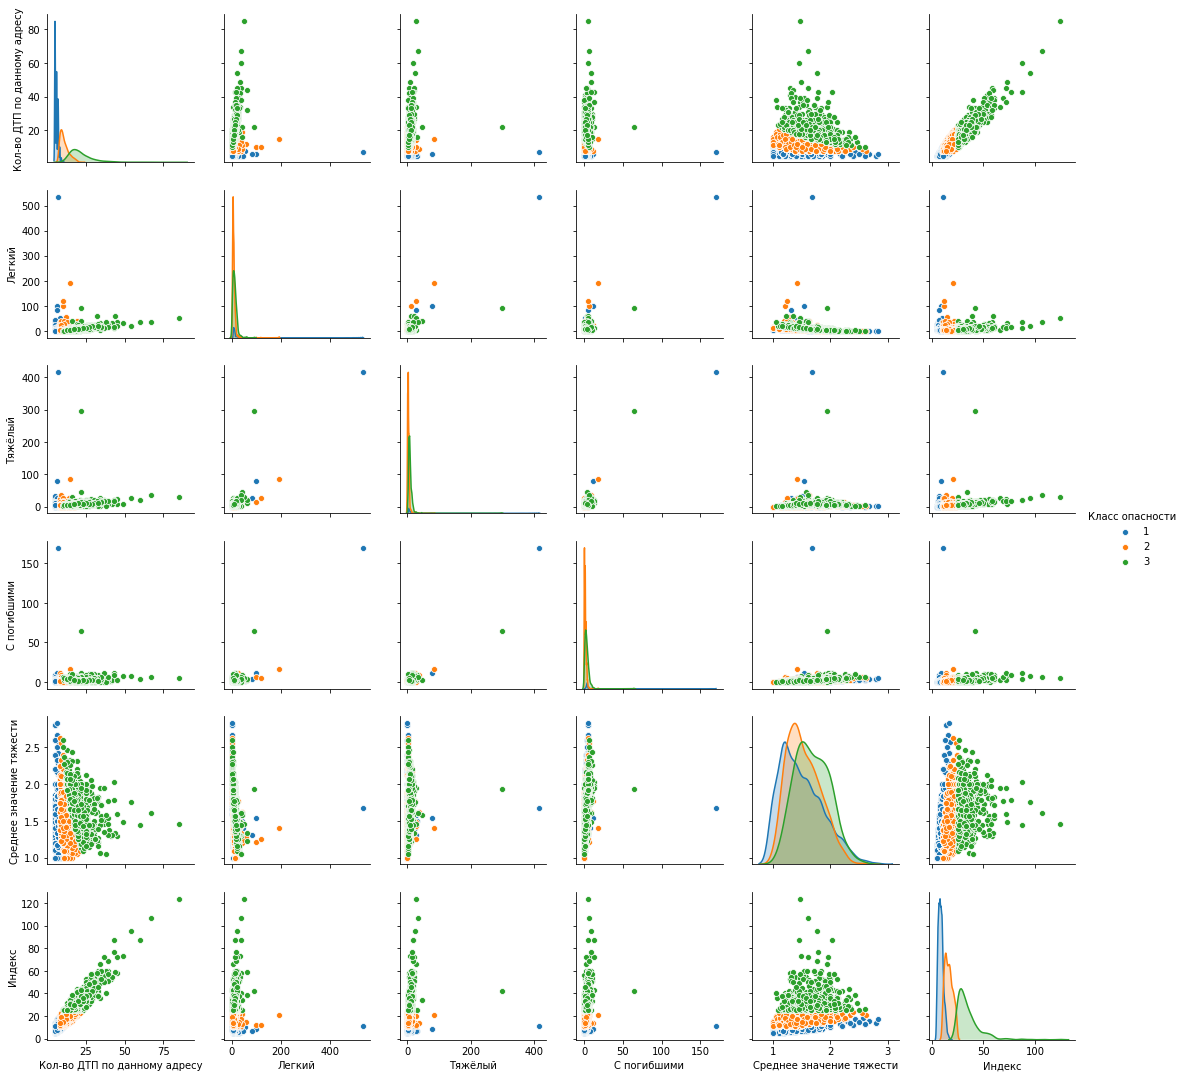

In [6]:
sns.pairplot(df, hue="Класс опасности")

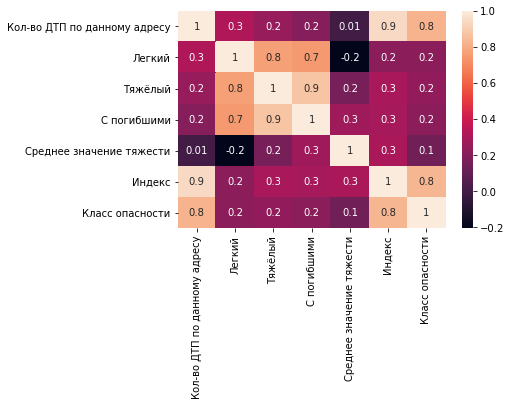

In [7]:
sns.heatmap(df.corr(), annot = True,  fmt='.1g')

In [8]:
df = df[['Кол-во ДТП по данному адресу','Среднее значение тяжести','Индекс','Класс опасности']]

In [8]:
df = df[['Легкий','Тяжёлый','С погибшими','Класс опасности']]

In [9]:
df

,Легкий,Тяжёлый,С погибшими,Класс опасности
0,9,5,0,2
1,100,13,6,2
2,17,3,2,3
3,16,4,0,2
4,5,0,1,1
...,...,...,...,...
4076,4,2,0,1
4077,5,5,0,2
4078,4,3,0,1
4079,3,4,1,2


In [10]:
X = df.drop('Класс опасности', axis=1)
y = df['Класс опасности']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7, 
                                                    random_state=42,
                                                    stratify=y)

In [12]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,stratify=y_test)

In [13]:
X

,Легкий,Тяжёлый,С погибшими
0,9,5,0
1,100,13,6
2,17,3,2
3,16,4,0
4,5,0,1
...,...,...,...
4076,4,2,0
4077,5,5,0
4078,4,3,0
4079,3,4,1


Построение модели нелинейная классификации и оценка ее качества

In [14]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(confusion_matrix(y_val,lr.predict(X_val)))
print(classification_report(y_val,lr.predict(X_val)))
print(accuracy_score(y_val, lr.predict(X_val)))

[[177   5   1]
 [ 74  15   2]
 [  1  25   7]]
              precision    recall  f1-score   support

           1       0.70      0.97      0.81       183
           2       0.33      0.16      0.22        91
           3       0.70      0.21      0.33        33

    accuracy                           0.65       307
   macro avg       0.58      0.45      0.45       307
weighted avg       0.59      0.65      0.59       307

0.6482084690553745


In [15]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
print(confusion_matrix(y_val,classifier.predict(X_val)))
print(classification_report(y_val,classifier.predict(X_val)))
print(accuracy_score(y_val, classifier.predict(X_val)))

[[172   9   2]
 [  4  82   5]
 [  1   7  25]]
              precision    recall  f1-score   support

           1       0.97      0.94      0.96       183
           2       0.84      0.90      0.87        91
           3       0.78      0.76      0.77        33

    accuracy                           0.91       307
   macro avg       0.86      0.87      0.86       307
weighted avg       0.91      0.91      0.91       307

0.9087947882736156


In [16]:
xgb_cls = XGBClassifier()
xgb_cls.fit(X_train, y_train)
y_pred = xgb_cls.predict(X_test)
print(confusion_matrix(y_val,xgb_cls.predict(X_val)))
print(classification_report(y_val,xgb_cls.predict(X_val)))
print(accuracy_score(y_val,xgb_cls.predict(X_val)))

D:\Programs\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:35:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[170  11   2]
 [  1  85   5]
 [  1   8  24]]
              precision    recall  f1-score   support

           1       0.99      0.93      0.96       183
           2       0.82      0.93      0.87        91
           3       0.77      0.73      0.75        33

    accuracy                           0.91       307
   macro avg       0.86      0.86      0.86       307
weighted avg       0.91      0.91      0.91       307

0.9087947882736156


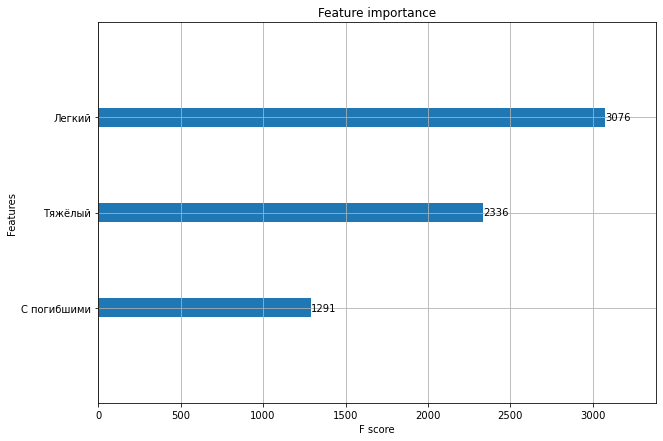

In [17]:
plt.rcParams["figure.figsize"] = (10,7)
plot_importance(xgb_cls)

Сохраним модель

In [18]:
with open("model.pkl", "wb") as f:
    pickle.dump(classifier, f)